# Linear Regression

### 1. Import the needed libraries

__`Step 1`__ - The first thing you should do is always import the needed libraries. In this case, we are going to import:
- pandas as pd
- numpy as np
- LinearRegression from sklearn.linear_model
- train_test_split from sklearn.model_selection
- matplotlib.pyplot as plt

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 2. Import the dataset

Since we are dealing with linear regression, we are going to work with a dataset where the target is continuous. <br>
__`Step 2`__ - Import the dataset __Boston.csv__ using pandas and assign it to an object named __data__

In [2]:
data = pd.read_csv('datasets/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Variables:<br>

`INPUT VARIABLES`: numerical <br>
`OUPUT VARIABLE`: numeric (regression) <br>

__GOAL__: Predict median value of homes

`CRIM` : per capita crime rate by town <br>
`ZN` : proportion of residential land zoned for lots over 25,000 sq.ft. <br>
`INDUS` : proportion of non-retail business acres per town. <br>
`CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
`NOX` : nitric oxides concentration (parts per 10 million) <br>
`RM`: average number of rooms per dwelling <br>
`AGE`: proportion of owner-occupied units built prior to 1940 <br>
`DIS`: weighted distances to five Boston employment centres <br>
`RAD`: index of accessibility to radial highways <br>
`TAX`: full-value property-tax rate per \$10.000 <br>
`PTRATIO`: pupil-teacher ratio by town <br>
`B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
`LSTAT`: % lower status of the population <br>
`MEDV`: Median value of owner-occupied homes in $1000's <br>

### 3. Explore the dataset

The next step is to explore our data: while this is not the focus for this class, we are just going to check if we don't have missing values and what is the type of data that we have.

__`Step 3`__ - Call the method __info()__ in your data. <br>
This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


By calling the __info()__ method, we can verify that we don't have missing values and all data is numerical, so there is no need to deal with missing data or create dummies. <br>
We are ready to apply linear regression in our dataset! But first, and since we want to evaluate the performance of our model, we need to split our dataset into training and validation. Since we only have 506 observations, we are not going to create a test dataset.

### 4. Data partition

__`Step 4`__ - By calling the method __train_test_split()__, split your dataset into train (70%) and validation (30%). Don't forget that you need to define first what are your independent variables and your target/ dependent variable. <br>

- Define as __X__ the independent variables and __y__ the dependent variable (last column - 'medv')
- Divide the __X__ into __X_train__ and __X_val__, the __y__ into __y_train__ and __y_val__, and define the following arguments: __test_size = 0.3__, __random_state = 15__ 

In [4]:
X = data.drop(columns=['medv'])
y = data['medv']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15)

### 5. Apply linear regression

__`Step 5`__ - Create an instance of LinearRegression named as lin_model with the default parameters and fit to your train data.

In [6]:
lin_model = LinearRegression()

<div class="alert alert-block alert-success">
    <b><h3>Methods in LinearRegression()</h3></b><br>
</div>

<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().fit(X,y,...)</a>

__Definition:__ <br>
Fit linear model in the training data.

__Parameters:__ <br>
X : The regressors in my training dataset; <br>
y : The target in my training dataset; <br>
...
</div>

__`Step 6`__ - Fit your model to your data, and define __X = X_train__ and __y = y_train__

In [7]:
lin_model.fit(X_train, y_train)

LinearRegression()

<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().predict(X)</a>

__Definition:__ <br>
Predict using the linear model.

__Parameters:__ <br>
X : Samples to predict; <br>
...

</div>

__`Step 7`__ - Predict the values for __X_val__ by applying the method __predict()__ to your model and check your result

In [8]:
predictions = lin_model.predict(X_val)
predictions

array([28.93841071, 40.17469652, 23.26283893, 22.72011976, 26.33677317,
        6.50809139, 16.72675328, 13.83049735, 28.38006838, 16.83901688,
       17.50579197, 22.45848043, 15.59048086, 16.11229233, 20.62101705,
       15.20710548,  8.47374859,  7.69857378, 21.45782622, 10.97606569,
       38.72583349, 13.26023439, 23.33227986, 19.27402726, 19.3360351 ,
       19.62525449, 27.32359007, 19.91480848, 19.97039516, 19.98919575,
       21.45883975,  7.54689782, 20.33795817, 19.38369205, 23.37468039,
       19.05153146, 24.46267997, 28.19200979, 20.69966547, 18.68680301,
       28.11584489, 35.29854655, 20.0879725 , 27.8604335 , 25.57788978,
       21.59692292, 21.74601139, 30.24313863, 25.66136714, 20.36289475,
       31.39205843, 15.24938636, 14.28689956, 14.33724217, 17.70236617,
       30.67294605,  8.45801637, 29.38244272, 16.52514507, 26.35269311,
       17.64563127, 27.64146931, 18.83849367, 30.29337701, 34.33685682,
       20.40053045, 23.50840914, 18.29950906, 25.26796658, 18.96

Those are the predicted values to your validation dataset by applying the model created previously based on train data.

<div class="alert alert-block alert-success">
    <b><h3>Attributes in LinearRegression()</h3></b><br>
</div>

<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().coef_</a>

__Definition:__ <br>
Coefficient of the features in the decision function.

</div>

__`Step 8`__ - To check the coefficients calculated by applying the linear regression, call the attribute __coef___ associated to your model

In [9]:
lin_model.coef_

array([-7.30973225e-02,  6.66062943e-02,  8.45497046e-02,  2.21512330e+00,
       -2.27372067e+01,  3.24861978e+00,  2.06578129e-02, -1.59247039e+00,
        3.48847293e-01, -1.39796398e-02, -9.58296625e-01,  9.98858984e-03,
       -5.92254599e-01])

The result is an array that shows all the coefficients. In order to better understand what is the variable associated to each coefficient, let's convert the result to a DataFrame and define as headers the variables.

__`Step 9`__ - Create a dataframe that will contain the values of the coefficients

In [10]:
df = pd.DataFrame(lin_model.coef_)
df

,0
0,-0.073097
1,0.066606
2,0.084550
3,2.215123
4,-22.737207
5,3.248620
6,0.020658
7,-1.592470
8,0.348847
9,-0.013980


__`Step 10`__ - By using the method __set_index()__, define the index of Dataframe equal to the name of the variables

In [11]:
df = df.set_index(X_train.columns)
df

,0
crim,-0.073097
zn,0.066606
indus,0.084550
chas,2.215123
nox,-22.737207
rm,3.248620
age,0.020658
dis,-1.592470
rad,0.348847
tax,-0.013980


<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().intercept_</a>

__Definition:__ <br>
Independent term in the linear model.

</div>

__`Step 11`__ - To obtain the intercept of the linear regression, call the attribute __intercept___ associated to your model

In [12]:
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0.
lin_model.intercept_

41.76845495082392

<div class="alert alert-block alert-warning">
<h1><center>Calculate the p-values</center></h1>
</div>

https://regressors.readthedocs.io/en/latest/_modules/regressors/stats.html

The library sklearn doesn't have any option that allows to calculate automatically the standard error associated to each coefficient, the t-value and the p-value. <br>

One alternative is to use the library regressors.

__`Step 12`__ - Install the library regressors

In [13]:
import sys
!{sys.executable} -m pip install regressors


You should consider upgrading via the 'C:\Users\lara_\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


Now we are able to use the library __regressors__ <br>
__`Step 13`__ - Import __stats__ from regressors

In [14]:
from regressors import stats

__`Step 14`__ - Create a new object named __xlabels__ that will contain the name of the columns in __X_train__

In [15]:
xlabels = X_train.columns

__`Step 15`__ - From stats, call the method __summary()__ that will have as parameters:
- __clf = lin_model__ : The linear model created previously <br>
- __X = X_train__ :  The training data used to fit the classifier <br>
- __y = y_train__ : The target training values <br>
- __xlabels = xlabels__ :  The labels for the predictors <br>


In [16]:
stats.summary(clf = lin_model, X = X_train, y = y_train, xlabels = xlabels)

Residuals:
     Min      1Q  Median     3Q     Max
-23.7925 -1.6048  0.4249 2.7447 11.1005


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept  41.768455    5.723473   7.2977  0.000000
crim        -0.073097    0.040925  -1.7861  0.074934
zn           0.066606    0.012070   5.5183  0.000000
indus        0.084550    0.067125   1.2596  0.208654
chas         2.215123    1.038390   2.1332  0.033595
nox        -22.737207    4.043747  -5.6228  0.000000
rm           3.248620    0.306173  10.6104  0.000000
age          0.020658    0.010811   1.9108  0.056837
dis         -1.592470    0.214862  -7.4116  0.000000
rad          0.348847    0.067599   5.1605  0.000000
tax         -0.013980    0.001190 -11.7439  0.000000
ptratio     -0.958297    0.101769  -9.4164  0.000000
black        0.009989    0.001257   7.9486  0.000000
lstat       -0.592255    0.049160 -12.0476  0.000000
---
R-squared:  0.76160,    Adjusted R-squared:  0.75249
F-statistic: 83.55 on 13 features


The summary statistic table calls many of the stats outputs the statistics in an pretty format, containing all the needed values to interpret our model: The residuals distribution, the coefficients and the t-value and the p-value for each of them, and also the evaluation of the model using the metrics R-Squared, Adjusted R-Squared and F-statistic. That evaluation, however, is based on the performance of the model in the training dataset. <br>

But in the last class, we saw how to calculate the R-Squared and the Adjusted R-Squared to our validation dataset by using __sklearn__.

__The p-value__ <br>
For each estimated regression coefficient, the p-value provides an estimate of the probability that the true coefficient is zero given the value of the estimate. Small p-values suggest that the true coefficient is very unlikely to be zero, which means that the feature is extremely unlikely to have no relationship with the dependent variable. <br> In this way, we can also check the p-value to understand the feature importance and select the most "important" variables to build our final model.




>><font color='Orange'> __Practice__ </font>

It's time now to build step by step a simple linear regression. To calculate the coefficient we are going to use the formula:

$$\beta _{1} = \frac{\sum \left ( x_{i}-\bar{x})( y_{i}-\bar{y}\right )}{\sum ( x_{i}-\bar{x})^{2}}$$

And the intercept is going to be calculated using the formula:
$$\beta _{0} = \bar{y} - \beta _{1}\bar{x} $$

You are going to work with the following dataset:

In [17]:
houses = pd.DataFrame({'m^2':[16,15,28,14,22,13],'Price':[360,340,664,330,560,380]})
houses

,m^2,Price
0,16,360
1,15,340
2,28,664
3,14,330
4,22,560
5,13,380


__`Step 16`__: Try to calculate the regression equation associated to the dataset step by step and predict the value for a house with $19m^{2}$

__`16.1.`__ Calculate the mean of the values in your X and assign it to the object __mean_m2__. In the same way, calculate the mean of your target and assign it to the object __mean_price__

In [18]:
mean_m2 = houses["m^2"].mean()
mean_m2

18.0

In [19]:
mean_price = houses["Price"].mean()
mean_price

439.0

__`16.2`__ Create a new column in your dataset 'houses' named as __xi-x_mean__ that will contain $( x_{i}-\bar{x})$

In [20]:
houses['xi-x_mean'] = houses["m^2"] - mean_m2
houses

,m^2,Price,xi-x_mean
0,16,360,-2.0
1,15,340,-3.0
2,28,664,10.0
3,14,330,-4.0
4,22,560,4.0
5,13,380,-5.0


__`16.3`__ Create a new column in your dataset 'houses' named as __yi-y_mean__ that will contain $( y_{i}-\bar{y})$

In [21]:
houses['yi-y_mean'] = houses["Price"] - mean_price
houses

,m^2,Price,xi-x_mean,yi-y_mean
0,16,360,-2.0,-79.0
1,15,340,-3.0,-99.0
2,28,664,10.0,225.0
3,14,330,-4.0,-109.0
4,22,560,4.0,121.0
5,13,380,-5.0,-59.0


__`16.4`__ Create a new column in your dataset 'houses' named as __square(xi-x_mean)__ that will be equal to $(x_{i}-\bar{x})^{2}$

In [22]:
houses['square(xi-x_mean)'] = houses['xi-x_mean']**2
houses

,m^2,Price,xi-x_mean,yi-y_mean,square(xi-x_mean)
0,16,360,-2.0,-79.0,4.0
1,15,340,-3.0,-99.0,9.0
2,28,664,10.0,225.0,100.0
3,14,330,-4.0,-109.0,16.0
4,22,560,4.0,121.0,16.0
5,13,380,-5.0,-59.0,25.0


__`16.5`__ Create a new column in your dataset 'houses' named as __(xi-x_mean)(yi-y_mean)__ that will be equal to $( x_{i}-\bar{x})( y_{i}-\bar{y})$

In [23]:
houses['(xi-x_mean)(yi-y_mean)'] = houses['xi-x_mean']*houses['yi-y_mean']
houses

,m^2,Price,xi-x_mean,yi-y_mean,square(xi-x_mean),(xi-x_mean)(yi-y_mean)
0,16,360,-2.0,-79.0,4.0,158.0
1,15,340,-3.0,-99.0,9.0,297.0
2,28,664,10.0,225.0,100.0,2250.0
3,14,330,-4.0,-109.0,16.0,436.0
4,22,560,4.0,121.0,16.0,484.0
5,13,380,-5.0,-59.0,25.0,295.0


__`16.6`__ Calculate the coefficient of 'm^2' by using the formula below and assign it to the object __beta1__ <br> <br>
$$\beta _{1} = \frac{\sum \left ( x_{i}-\bar{x})( y_{i}-\bar{y}\right )}{\sum ( x_{i}-\bar{x})^{2}}$$

In [24]:
beta1 = houses['(xi-x_mean)(yi-y_mean)'].sum()/houses['square(xi-x_mean)'].sum()
beta1

23.058823529411764

__`16.7`__ Calculate the intercept and name it as __beta0__ by using the formula <br><br>

$$\beta _{0} = \bar{y} - \beta _{1}\bar{x} $$

In [25]:
beta0 = mean_price - beta1*mean_m2
beta0

23.941176470588232

__`16.8`__ Predict the price of a house with $19m^{2}$

In [26]:
prediction = beta0 + beta1*19
prediction

462.05882352941177

### Plot your regression!

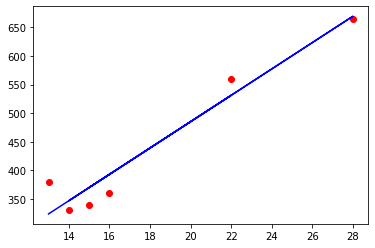

In [27]:
X = houses['m^2']
y = houses['Price']
predictions = []

for value in X:
    predictions.append(beta0 + beta1*value)

fig = plt.figure()
plt.plot(X, y, 'r.', markersize=12)
plt.plot(X, predictions, 'b-')
plt.show()